<a href="https://colab.research.google.com/github/Meenu2022/Heart_Disease_Prediction_Streamlit/blob/All_four_models/Heart_Disease_prediction_All_four_Models_(Random_Forest%2C_SVM%2C_KNN%2C_Decision_Tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Load the dataset
file_path = "/content/drive/My Drive/Project_Presentations/S7_Project_Work_I/Medicaldataset.csv"
df = pd.read_csv(file_path)
df = df.rename(columns={"Systolic blood pressure": "ap_hi", "Diastolic blood pressure": "ap_lo"})

In [4]:
# Feature scaling
scaler = StandardScaler()
X = df.drop('Result', axis=1)
y = df['Result']
X_scaled = scaler.fit_transform(X)

In [5]:
# Encoding the target label
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [7]:
# Define models
random_forest = RandomForestClassifier(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(probability=True)

In [8]:
# Train models
random_forest.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(probability=True)

In [9]:
# Create a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', random_forest),
        ('dt', decision_tree),
        ('knn', knn),
        ('svm', svm)
    ],
    voting='soft'  # Use 'soft' for probability averaging or 'hard' for majority voting
)


In [10]:
# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [11]:
# Make predictions
predictions = voting_clf.predict(X_test)

In [12]:
# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


In [13]:
# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.96
Precision: 0.96
Recall: 0.98
F1-Score: 0.97


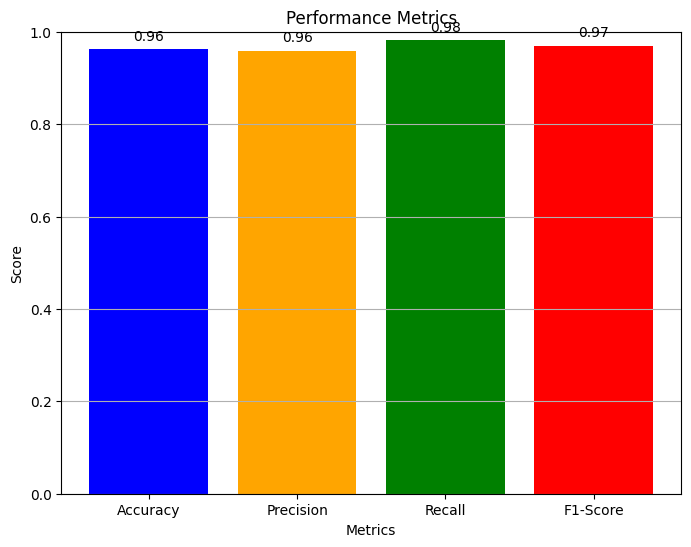

In [14]:
import matplotlib.pyplot as plt

# Prepare data for visualization
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)  # Set the limit from 0 to 1 for better visualization
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.grid(axis='y')

# Add the value annotations on top of the bars
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.show()

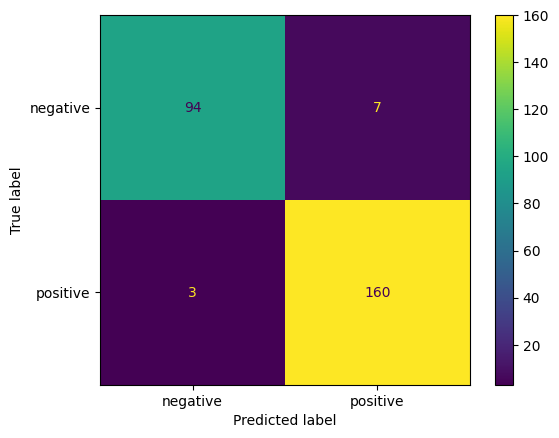

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and predictions are already defined

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Create ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

# Plot confusion matrix
cm_display.plot()
plt.show()


In [16]:
# ROC and AUC
from sklearn.metrics import roc_curve, auc

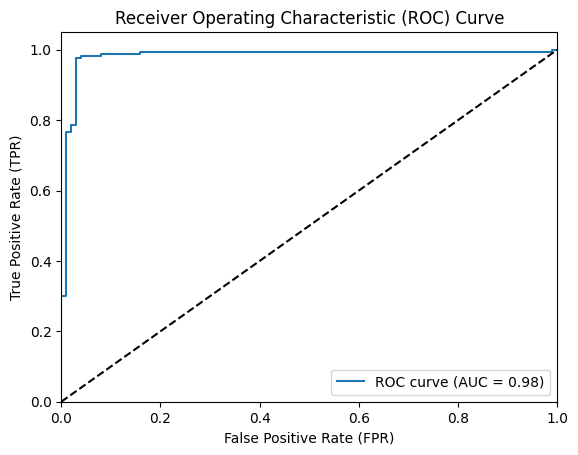

In [17]:
# Predict probabilities
y_prob = voting_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [18]:
# New test data with all the columns that were used during training
new_data = pd.DataFrame({
    'Age': [45],
    'Gender': [0],  # Male
    'Heart rate': [80],
    'ap_hi': [117],
    'ap_lo': [83],
    'Blood sugar': [143],
    'CK-MB': [2.49],  # Example value
    'Troponin': [0.003]  # Example value
})

# Scale new data
new_data_scaled = scaler.transform(new_data)

# Prediction for new test data
new_prediction = voting_clf.predict(new_data_scaled)
new_prediction_proba = voting_clf.predict_proba(new_data_scaled)

print(f"Prediction: {'Heart Attack' if new_prediction[0] == 1 else 'No Heart Attack'}")
print(f"Prediction Probability: {new_prediction_proba[0]}")

Prediction: No Heart Attack
Prediction Probability: [0.78055035 0.21944965]


In [19]:
import joblib
joblib.dump(scaler, '/content/drive/My Drive/Project_Presentations/S7_Project_Work_I/scaler.pkl')
joblib.dump(voting_clf, '/content/drive/My Drive/Project_Presentations/S7_Project_Work_I/voting_clf.pkl')


['/content/drive/My Drive/Project_Presentations/S7_Project_Work_I/voting_clf.pkl']